In [49]:
pip install jedi

In [50]:
%config Completer.use_jedi = False


In [1]:
!pip install openpyxl

In [56]:
import numpy as np
import pandas as pd
data  = pd.read_excel("neighbourhood_damage_raw.xlsx")

In [3]:
data = data.drop(columns = ["DN","TIP","adm1_tr","adm2_tr","adm2","Shape_Leng","Shape_Area","adm1"])

In [4]:
test = pd.DataFrame(data.groupby(['amd3_tr'])['damage'].agg(pd.Series.mode))

In [5]:
def replace_list(row):
    if isinstance(row, np.ndarray):
        return row[-1]  # replace the list with its higher damage grade
    else:
        return row  # leave other values unchanged
test = test.applymap(replace_list)  


In [6]:
test

,damage
amd3_tr,
5 Nisan Mh.,2.0
Abdülhamid Han Mh.,1.0
Akif İnan Mh.,2.0
Aksu Mh.,3.0
Akçakoyunlu Mh.,1.0
...,...
Şazi Bey Mh.,3.0
Şehit Abdullah Çavuş Mh.,3.0
Şehit Evliya Mh.,2.0


In [7]:
province = []
state = []
x_coordinate = []
y_coordinate = []
for i in range(len(test)):
    province.append(np.unique(data.adm1_en[data.amd3_tr==test.iloc[i].name])[0])
    state.append(np.unique(data.adm2_en[data.amd3_tr==test.iloc[i].name])[0])
    x_coordinate.append(np.unique(data.x_coord[data.amd3_tr==test.iloc[i].name])[0])
    y_coordinate.append(np.unique(data.y_coord[data.amd3_tr==test.iloc[i].name])[0])
test['province'] = province
test['state'] = state
test['x_coord'] = x_coordinate
test['y_coord'] = y_coordinate

In [8]:
test

,damage,province,state,x_coord,y_coord
amd3_tr,,,,,
5 Nisan Mh.,2.0,KAHRAMANMARAS,ONIKISUBAT,36.862,37.614
Abdülhamid Han Mh.,1.0,KAHRAMANMARAS,ONIKISUBAT,36.903,37.580
Akif İnan Mh.,2.0,KAHRAMANMARAS,ONIKISUBAT,36.893,37.584
Aksu Mh.,3.0,KAHRAMANMARAS,DULKADIROGLU,36.926,37.529
Akçakoyunlu Mh.,1.0,KAHRAMANMARAS,ONIKISUBAT,36.920,37.587
...,...,...,...,...,...
Şazi Bey Mh.,3.0,KAHRAMANMARAS,ONIKISUBAT,36.920,37.566
Şehit Abdullah Çavuş Mh.,3.0,KAHRAMANMARAS,ONIKISUBAT,36.884,37.584
Şehit Evliya Mh.,2.0,KAHRAMANMARAS,ONIKISUBAT,36.925,37.588


In [9]:
test.reset_index(inplace=True) # Resets the index, makes factor a column
test.amd3_tr = [i[0:-2]+'a'+i[-2:] for i in test.amd3_tr]
# the terms in population all have a mah at the end while for test is only mh

In [10]:
population = pd.read_csv("Population_by_district.csv")
#popualtion data obtained from https://biruni.tuik.gov.tr/medas/?kn=95&locale=en


In [11]:
# the test has all caps and the district names are in english so they do not have special characters
population['Province'] = [i.upper() for i in population.Province]
population['District'] = [i.upper() for i in population.District]
population = population.rename(columns={'Sum of Populatiion': 'Population'})

In [12]:
population

,District,Neighbourhood,Population,Province
0,AFŞIN,Afşinbey Mah.,7102,KAHRAMANMARAŞ
1,AFŞIN,Ağcaşar Mah.,125,KAHRAMANMARAŞ
2,AFŞIN,Alemdar Mah.,384,KAHRAMANMARAŞ
3,AFŞIN,Alimpınar Mah.,1209,KAHRAMANMARAŞ
4,AFŞIN,Alpaslan Mah.,3412,KAHRAMANMARAŞ
...,...,...,...,...
708,TÜRKOĞLU,Yeniköy Mah.,227,KAHRAMANMARAŞ
709,TÜRKOĞLU,Yenipınar Mah.,448,KAHRAMANMARAŞ
710,TÜRKOĞLU,Yeşilyöre Mah.,3978,KAHRAMANMARAŞ
711,TÜRKOĞLU,Yeşilyurt Mah.,110,KAHRAMANMARAŞ


In [13]:
test.state = test.state.apply(lambda x: "DULKADIROĞLU" if x == "DULKADIROGLU" else "ONIKIŞUBAT")  # Replace values

In [14]:
test

,amd3_tr,damage,province,state,x_coord,y_coord
0,5 Nisan Mah.,2.0,KAHRAMANMARAS,ONIKIŞUBAT,36.862,37.614
1,Abdülhamid Han Mah.,1.0,KAHRAMANMARAS,ONIKIŞUBAT,36.903,37.580
2,Akif İnan Mah.,2.0,KAHRAMANMARAS,ONIKIŞUBAT,36.893,37.584
3,Aksu Mah.,3.0,KAHRAMANMARAS,DULKADIROĞLU,36.926,37.529
4,Akçakoyunlu Mah.,1.0,KAHRAMANMARAS,ONIKIŞUBAT,36.920,37.587
...,...,...,...,...,...,...
94,Şazi Bey Mah.,3.0,KAHRAMANMARAS,ONIKIŞUBAT,36.920,37.566
95,Şehit Abdullah Çavuş Mah.,3.0,KAHRAMANMARAS,ONIKIŞUBAT,36.884,37.584
96,Şehit Evliya Mah.,2.0,KAHRAMANMARAS,ONIKIŞUBAT,36.925,37.588
97,Şeyh Adil Mah.,1.0,KAHRAMANMARAS,DULKADIROĞLU,36.940,37.577


In [15]:
# merge the 2 dataset together
clean_dataset = population.merge(test, left_on=['Neighbourhood',"District"], right_on=['amd3_tr',"state"],how='inner')

In [16]:
clean_dataset

,District,Neighbourhood,Population,Province,amd3_tr,damage,province,state,x_coord,y_coord
0,DULKADIROĞLU,Aksu Mah.,4742,KAHRAMANMARAŞ,Aksu Mah.,3.0,KAHRAMANMARAS,DULKADIROĞLU,36.926,37.529
1,DULKADIROĞLU,Aslan Bey Mah.,11479,KAHRAMANMARAŞ,Aslan Bey Mah.,1.0,KAHRAMANMARAS,DULKADIROĞLU,36.962,37.585
2,DULKADIROĞLU,Bağlarbaşı Mah.,6403,KAHRAMANMARAŞ,Bağlarbaşı Mah.,2.0,KAHRAMANMARAS,DULKADIROĞLU,36.950,37.576
3,DULKADIROĞLU,Ballıca Mah.,4781,KAHRAMANMARAŞ,Ballıca Mah.,2.0,KAHRAMANMARAS,DULKADIROĞLU,36.964,37.591
4,DULKADIROĞLU,Bayazıtlı Mah.,5583,KAHRAMANMARAŞ,Bayazıtlı Mah.,1.0,KAHRAMANMARAS,DULKADIROĞLU,36.948,37.599
...,...,...,...,...,...,...,...,...,...,...
92,ONIKIŞUBAT,Yamaçtepe Mah.,7340,KAHRAMANMARAŞ,Yamaçtepe Mah.,1.0,KAHRAMANMARAS,ONIKIŞUBAT,36.846,37.593
93,ONIKIŞUBAT,Yirmiikigün Mah.,15471,KAHRAMANMARAŞ,Yirmiikigün Mah.,1.0,KAHRAMANMARAS,ONIKIŞUBAT,36.856,37.589
94,ONIKIŞUBAT,Yunus Emre Mah.,8627,KAHRAMANMARAŞ,Yunus Emre Mah.,3.0,KAHRAMANMARAS,ONIKIŞUBAT,36.899,37.583
95,ONIKIŞUBAT,Yürükselim Mah.,2387,KAHRAMANMARAŞ,Yürükselim Mah.,1.0,KAHRAMANMARAS,ONIKIŞUBAT,36.903,37.618


In [17]:
# to find the missing rows, perform a right join and find which ones are na
missing_entry = population.merge(test, left_on=['Neighbourhood',"District"], right_on=['amd3_tr',"state"],how='right')
missing_entry[missing_entry["Population"].isna()]


,District,Neighbourhood,Population,Province,amd3_tr,damage,province,state,x_coord,y_coord
7,NaN,NaN,NaN,NaN,Bahçelievler Mah.,3.0,KAHRAMANMARAS,DULKADIROĞLU,36.938,37.568
16,NaN,NaN,NaN,NaN,Delilköy Mah.,3.0,KAHRAMANMARAS,DULKADIROĞLU,36.953,37.491


In [18]:
population[population.Neighbourhood=="Bahçelievler Mah."] # they are not part in KAHRAMANMARAS, and we have crossed check with the database. Population data not found

,District,Neighbourhood,Population,Province
275,ELBISTAN,Bahçelievler Mah.,2912,KAHRAMANMARAŞ
365,GÖKSUN,Bahçelievler Mah.,2641,KAHRAMANMARAŞ


In [19]:
!pip install geopy

In [20]:
relief_center_data = pd.read_csv("Releif_Center_Locations.csv")

In [21]:
relief_center_data

,Facility Type,X Coordinate,Y Coordinate
0,Worship,36.857,37.584
1,Worship,36.873,37.596
2,Worship,36.917,37.583
3,Worship,36.921,37.553
4,Worship,36.920,37.584
5,Worship,36.936,37.559
6,Worship,36.908,37.593
7,Hospital,36.929,37.578
8,Hospital,36.928,37.578
9,Hospital,36.925,37.573


In [22]:
row_header = ["Exisiting facility"+str(i) for i in range(len(relief_center_data))]
col_header = clean_dataset.amd3_tr
Facility_Demand_Distance_Matrix = pd.DataFrame(0, index=row_header, columns=col_header)

In [23]:
from geopy import distance
for center_index in range(len(relief_center_data)):
    center_location = (relief_center_data.iloc[center_index]["Y Coordinate"], relief_center_data.iloc[center_index]["X Coordinate"])
    distance_array = []
    for demand_index in range(len(clean_dataset)):
        demand_location = (clean_dataset.iloc[demand_index].y_coord,clean_dataset.iloc[demand_index].x_coord)
        distance_raw = distance.distance(center_location,demand_location).km
        distance_array.append(round(distance_raw,3))
    Facility_Demand_Distance_Matrix.iloc[center_index] = distance_array
# for each relief center location we need to find the distance from 

In [24]:
Facility_Demand_Distance_Matrix

amd3_tr,Aksu Mah.,Aslan Bey Mah.,Bağlarbaşı Mah.,Ballıca Mah.,Bayazıtlı Mah.,Divanlı Mah.,Doğu Kent Mah.,Dulkadiroğlu Mah.,Duraklı Mah.,Egemenlik Mah.,...,Süleymanşah Mah.,Tavşan Tepe Mah.,Tekerek Mah.,Üngüt Mah.,Vadi Mah.,Yamaçtepe Mah.,Yirmiikigün Mah.,Yunus Emre Mah.,Yürükselim Mah.,Yusuflar Mah.
Exisiting facility0,8.627,9.275,8.263,9.482,8.208,6.893,11.402,8.145,7.508,6.547,...,1.920,3.964,0.344,2.731,1.676,1.393,0.562,3.711,5.544,5.830
Exisiting facility1,8.788,7.955,7.154,8.056,6.632,5.587,10.019,6.973,6.238,5.727,...,1.196,2.092,2.128,3.797,2.566,2.408,1.690,2.712,3.603,4.612
Exisiting facility2,6.046,3.981,3.017,4.245,3.263,1.624,6.120,2.861,2.211,1.790,...,5.334,2.950,5.216,7.818,4.297,6.368,5.429,1.590,4.077,0.541
Exisiting facility3,2.700,5.073,3.617,5.676,5.635,3.866,6.933,3.801,3.909,2.015,...,7.515,6.006,6.375,9.349,5.023,7.975,6.996,3.855,7.387,3.445
Exisiting facility4,6.127,3.711,2.795,3.963,2.981,1.343,5.846,2.621,1.943,1.745,...,5.542,3.053,5.486,8.060,4.582,6.612,5.680,1.858,4.061,0.265
Exisiting facility5,3.445,3.688,2.256,4.328,4.564,2.998,5.465,2.499,2.825,1.369,...,8.100,6.080,7.311,10.224,6.034,8.800,7.812,4.217,7.168,3.003
Exisiting facility6,7.279,4.851,4.162,4.951,3.595,2.508,6.911,3.941,3.165,3.155,...,4.245,1.597,4.613,6.897,4.024,5.476,4.614,1.365,2.810,1.659
Exisiting facility7,5.445,3.017,1.868,3.412,2.872,1.034,5.156,1.770,1.327,0.888,...,6.526,4.089,6.280,8.969,5.241,7.518,6.562,2.707,4.998,0.851
Exisiting facility8,5.441,3.102,1.956,3.492,2.924,1.082,5.242,1.858,1.405,0.892,...,6.445,4.024,6.192,8.883,5.153,7.431,6.476,2.621,4.958,0.799
Exisiting facility9,4.884,3.529,2.233,3.982,3.529,1.692,5.639,2.222,1.935,0.486,...,6.451,4.255,5.985,8.771,4.859,7.322,6.348,2.551,5.359,1.234


In [25]:
# distance to the airport
row_header = ["Exisiting facility"+str(i) for i in range(len(relief_center_data))]
Facility_Airport_Distance_Matrix = pd.DataFrame(0, index=row_header, columns=["airport"])
airport_coordinates = (37.5402664329104, 36.9664595)
distance_array = []
for center_index in range(len(relief_center_data)):
    center_location = (relief_center_data.iloc[center_index]["Y Coordinate"], relief_center_data.iloc[center_index]["X Coordinate"])
    distance_raw = distance.distance(center_location,airport_coordinates).km
    distance_array.append(round(distance_raw,3))
Facility_Airport_Distance_Matrix['airport'] = distance_array

In [26]:
Facility_Airport_Distance_Matrix

,airport
Exisiting facility0,10.821
Exisiting facility1,10.317
Exisiting facility2,6.449
Exisiting facility3,4.259
Exisiting facility4,6.357
Exisiting facility5,3.401
Exisiting facility6,7.806
Exisiting facility7,5.338
Exisiting facility8,5.393
Exisiting facility9,5.159


In [27]:
np.sort(clean_dataset["Population"])

array([  381,   431,   579,   597,   802,   832,   910,  1437,  1458,
        1570,  1573,  1595,  1600,  1681,  1785,  2017,  2061,  2101,
        2263,  2297,  2387,  2400,  2404,  2455,  2550,  2587,  2627,
        2706,  2801,  3144,  3167,  3211,  3320,  3453,  3482,  3969,
        4018,  4023,  4115,  4117,  4155,  4335,  4426,  4438,  4471,
        4563,  4605,  4695,  4742,  4781,  4816,  4959,  5200,  5263,
        5307,  5403,  5474,  5583,  5652,  5674,  5852,  6060,  6280,
        6323,  6403,  6495,  6731,  7140,  7178,  7340,  7342,  7393,
        7479,  7574,  7612,  7771,  8079,  8310,  8379,  8627,  9182,
        9467, 10060, 10069, 10159, 10327, 11479, 12195, 12228, 12289,
       12747, 14216, 14520, 15045, 15471, 18429, 20440], dtype=int64)

In [28]:
a = []
for i in clean_dataset.damage:
    if(i==3):
        a.append(2)
    elif(i==2):
        a.append(1.5)
    else:
        a.append(i)
clean_dataset['damage_multiplier'] = a


In [29]:
clean_dataset["Total Demand"] = np.array(clean_dataset.Population) * np.array(a) *0.1
clean_dataset["Total Demand"] = [round(i) for i in clean_dataset["Total Demand"]]
sum(clean_dataset["Total Demand"])/16

5001.875

In [30]:
clean_dataset.head()

,District,Neighbourhood,Population,Province,amd3_tr,damage,province,state,x_coord,y_coord,damage_multiplier,Total Demand
0,DULKADIROĞLU,Aksu Mah.,4742,KAHRAMANMARAŞ,Aksu Mah.,3.0,KAHRAMANMARAS,DULKADIROĞLU,36.926,37.529,2.0,948
1,DULKADIROĞLU,Aslan Bey Mah.,11479,KAHRAMANMARAŞ,Aslan Bey Mah.,1.0,KAHRAMANMARAS,DULKADIROĞLU,36.962,37.585,1.0,1148
2,DULKADIROĞLU,Bağlarbaşı Mah.,6403,KAHRAMANMARAŞ,Bağlarbaşı Mah.,2.0,KAHRAMANMARAS,DULKADIROĞLU,36.950,37.576,1.5,960
3,DULKADIROĞLU,Ballıca Mah.,4781,KAHRAMANMARAŞ,Ballıca Mah.,2.0,KAHRAMANMARAS,DULKADIROĞLU,36.964,37.591,1.5,717
4,DULKADIROĞLU,Bayazıtlı Mah.,5583,KAHRAMANMARAŞ,Bayazıtlı Mah.,1.0,KAHRAMANMARAS,DULKADIROĞLU,36.948,37.599,1.0,558


why is school chosen as a POD
he majority of evacuation centres in areas impacted by Typhoon Haiyan in the Philippines were located in schools (Ramos et al. 2015),
Association of Structural Engineers of the Philippines, Inc. (2015) National Structural Code of the Philippines, vol 1 Buildings, Towers and other Vertical Structures—NSCP 2015. Available at: https://archive.org/stream/NSCP2015/NSCP-2015_djvu.txt

while in 2011, 89% of all public schools in Japan were allocated as evacuation sites (National Institute for Educational Policy Research 2011). 
Naylor A., Faure Walker J, Suppasri A (2018) Suitability of the early warning systems and temporary housing for the elderly population in the immediacy and transitional recovery phase of the 2011 Great East Japan Earthquake and Tsunami. Int J Disaster Risk Reduction 31:302–310.



The total demand is mutliplied with 0.1 as only 10% of demand can be satisfied at the first response to a disaster
Source: Modeling multiple humanitarian objectives in emergency response to large-scale disasters 
https://www.sciencedirect.com/science/article/abs/pii/S136655451400204X

Each facility has a capacity of 2000
units and costs $10,000 to place
https://sci-hub.se/10.1016/j.tre.2018.05.003

Since schools, places of worship already posses these facility to store the resources they need minimal resources and the size of these facilities are much larger than that of the temporary PODs. But since these loations are usually used for emergency shelter we will be assumign the cost is 5k and the storage is 5k. It is half the cost and double the capacity of a temp shelter but it is located further away from the cities

We will be focusing on just **Point of Distribution** 

In [31]:
sum(clean_dataset["Total Demand"])/2000

40.015

In [32]:
!pip install seaborn

<AxesSubplot:xlabel='x_coord', ylabel='y_coord'>

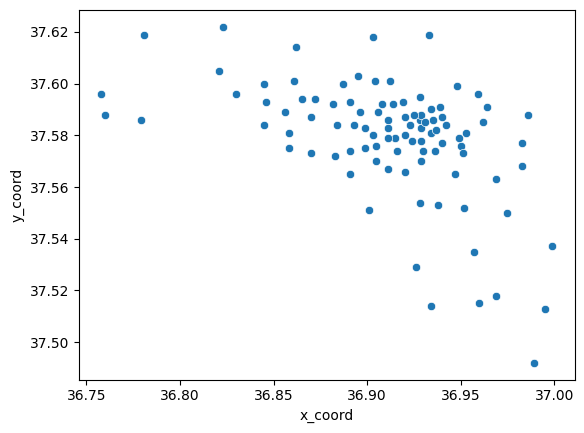

In [33]:
# From this we know that the minimum number of temporary PODs needed is 40 so we will cluster the 97 data points into 60 clusters 
data = pd.DataFrame()
data["x_coord"] = clean_dataset["x_coord"]
data["y_coord"] = clean_dataset["y_coord"]

import seaborn as sb
sb.scatterplot(x = data["x_coord"],y = data["y_coord"])

In [34]:
!pip install -U scikit-learn scipy matplotlib

In [35]:
#this is unscaled and we perform clustering on scale data for faster convergence
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)


<AxesSubplot:xlabel='x_coord', ylabel='y_coord'>

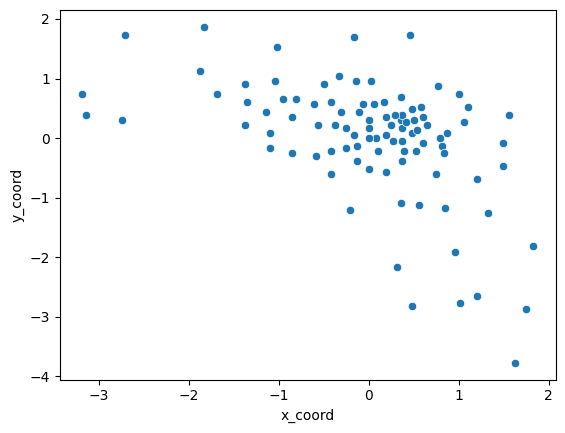

In [59]:
data = pd.DataFrame(X_scaled,columns = ["x_coord","y_coord"])
sb.scatterplot(x = data['x_coord'] ,y = data['y_coord'])

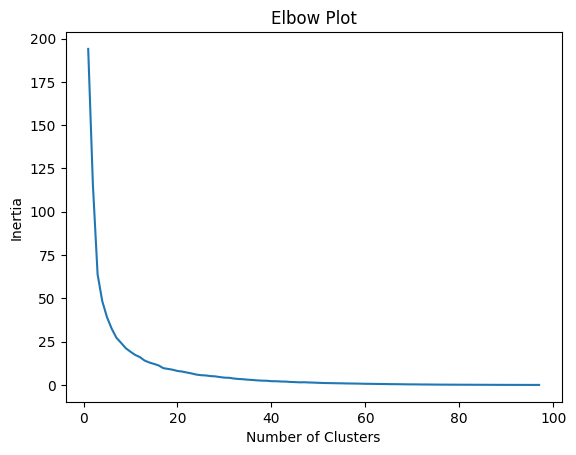

In [60]:
# Loop over a range of k values and fit the k-means algorithm
import matplotlib.pyplot as plt
inertias = []
for k in range(1, 98):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 98), inertias)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


[[36.91157143 37.57871429]
 [36.989      37.492     ]
 [36.8375     37.598     ]
 [36.957      37.535     ]
 [36.9306     37.5804    ]
 [36.891      37.6015    ]
 [36.976      37.5655    ]
 [36.76566667 37.59      ]
 [36.97066667 37.588     ]
 [36.901      37.551     ]
 [36.903      37.618     ]
 [36.862      37.57633333]
 [36.781      37.619     ]
 [36.9645     37.5165    ]
 [36.928      37.595     ]
 [36.912      37.56766667]
 [36.892      37.58366667]
 [36.93933333 37.553     ]
 [36.85425    37.58825   ]
 [36.862      37.614     ]
 [36.999      37.537     ]
 [36.93166667 37.57266667]
 [36.823      37.622     ]
 [36.975      37.55      ]
 [36.9116     37.5904    ]
 [36.983      37.577     ]
 [36.9486     37.5772    ]
 [36.995      37.513     ]
 [36.926      37.529     ]
 [36.866      37.59633333]
 [36.926      37.58633333]
 [36.821      37.605     ]
 [36.891      37.565     ]
 [36.891      37.57366667]
 [36.933      37.619     ]
 [36.938      37.5876    ]
 [36.934      37.514     ]
 

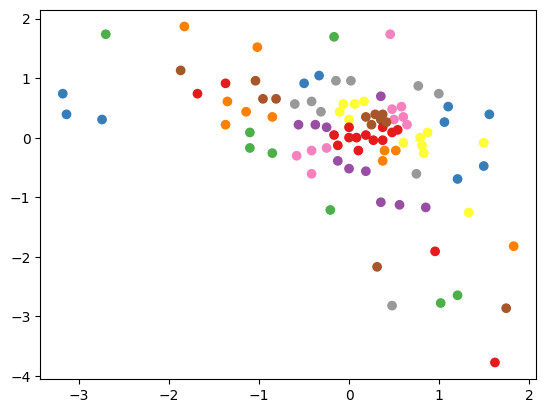

In [87]:
kmeans = KMeans(n_clusters=41, random_state=42)
kmeans.fit(X_scaled)
data["cluster_index"] = kmeans.predict(X_scaled)
temp_facility_coordinates = scaler.inverse_transform(kmeans.cluster_centers_)
print(temp_facility_coordinates)
plt.scatter(data["x_coord"], data["y_coord"], c=data['cluster_index'], cmap=plt.cm.Set1)

 minmially we need to establish 41 PODs to meet the demand, so we can either establish these PODs at the demand point so the distance between the facility and the demand point is almost 0 but the distance to other points might be further away. By clustering the datapoints we are able to find a point that is nearer to the demand points points. BUt at times even though it is very near the demand points it might be very far away from the warehouse. So we will append these new 41 cluster centres to list of demand locations

In [88]:
data_points = [[clean_dataset.y_coord[i],clean_dataset.x_coord[i]] for i in range(len(clean_dataset)) ]

In [89]:
# for temp_facility_coordinates the order is reversed, so we need to get the y coordinates first then the x coordinates
temp_facility_coordinates = [[i[1],i[0]] for i in temp_facility_coordinates]
data_points.extend(temp_facility_coordinates)
len(data_points) # suppose to be 41+97 so 138

138

In [91]:
data_points[97][0]

37.578714285714284

In [94]:
# For Point of Distribution we need the distance between the shelters and the Warehouse to be minimal, so we will first compute the distances of the shelters to that of the cities

# creating the empty dataframe header
row_header = ["Temp Facility"+str(i) for i in range(len(data_points))]
col_header = clean_dataset.amd3_tr
Temp_Facility_Demand_Distance_Matrix = pd.DataFrame(0, index=row_header, columns=col_header)


for temp_center_index in range(len(data_points)):
    location = (data_points[temp_center_index][0],data_points[temp_center_index][1])
    distance_array = []
    for demand_index in range(len(clean_dataset)):
        demand_location = (clean_dataset.iloc[demand_index].y_coord,clean_dataset.iloc[demand_index].x_coord)
        distance_raw = distance.distance(location,demand_location).km
        distance_array.append(round(distance_raw,3))
    Temp_Facility_Demand_Distance_Matrix.iloc[temp_center_index] = distance_array

In [95]:
Temp_Facility_Demand_Distance_Matrix.head()

amd3_tr,Aksu Mah.,Aslan Bey Mah.,Bağlarbaşı Mah.,Ballıca Mah.,Bayazıtlı Mah.,Divanlı Mah.,Doğu Kent Mah.,Dulkadiroğlu Mah.,Duraklı Mah.,Egemenlik Mah.,...,Süleymanşah Mah.,Tavşan Tepe Mah.,Tekerek Mah.,Üngüt Mah.,Vadi Mah.,Yamaçtepe Mah.,Yirmiikigün Mah.,Yunus Emre Mah.,Yürükselim Mah.,Yusuflar Mah.
Temp Facility0,0.000,6.982,5.631,7.657,8.009,6.376,8.425,5.910,6.266,4.558,...,9.841,8.658,8.331,11.280,6.952,10.021,9.088,6.451,10.085,6.110
Temp Facility1,6.982,0.000,1.456,0.689,1.986,2.387,2.146,1.327,1.770,3.357,...,9.095,6.245,9.197,11.722,8.235,10.284,9.373,5.569,6.369,3.446
Temp Facility2,5.631,1.456,0.000,2.074,2.559,1.728,3.447,0.344,1.135,1.971,...,8.336,5.708,8.146,10.829,7.075,9.378,8.427,4.571,6.242,2.545
Temp Facility3,7.657,0.689,2.074,0.000,1.669,2.621,1.971,1.879,2.093,3.872,...,9.164,6.237,9.428,11.847,8.540,10.424,9.541,5.809,6.164,3.704
Temp Facility4,8.009,1.986,2.559,1.669,0.000,1.844,3.571,2.222,1.747,3.630,...,7.686,4.701,8.196,10.426,7.469,9.032,8.200,4.678,4.498,2.765


In [97]:
row_header = ["Temp Facility"+str(i) for i in range(len(data_points))]
Temp_Facility_Airport_Distance_Matrix = pd.DataFrame(0, index=row_header, columns=["airport"])
airport_coordinates = (37.5402664329104, 36.9664595)
distance_array = []
for temp_center_index in range(len(data_points)):
    location = (data_points[temp_center_index][0],data_points[temp_center_index][1])
    distance_raw = distance.distance(location,airport_coordinates).km
    distance_array.append(round(distance_raw,3))
Temp_Facility_Airport_Distance_Matrix['airport'] = distance_array

In [98]:
Temp_Facility_Airport_Distance_Matrix.head()

,airport
Temp Facility0,3.788
Temp Facility1,4.981
Temp Facility2,4.224
Temp Facility3,5.635
Temp Facility4,6.720


In [99]:
from rsome import ro
import numpy as np
from rsome import grb_solver as grb

# there are 2 decision variables, 1 is a binary variable to decide if a facility should be open and the other is how much should we transfer from facility i to demand point j

temp_facility_model = ro.Model()

#decision variables

#let xij be the amount delievered from facility i to demand point j
# we have 60 facilities and 97 demand points so xij will be a 60 by 97 matrix
x = temp_facility_model.dvar((138,97),"I") # they are no of units to be tranported so it has to be integer

#let zi be the amount delivered to facility i from the warehoue, and since we have 60 facilities, it will have 60 dimension
z = temp_facility_model.dvar(138,"I")

#let yi be the binary variable to decide if facility i should be open or not, so it will also have 60 dimension
y = temp_facility_model.dvar(138,"B")



#data preperation
# currently the data that we have is a dataframe it will be easier if it was a an array
temp_distance_array = Temp_Facility_Demand_Distance_Matrix.values
no_facility,no_demand = temp_distance_array.shape
# since all the facilities share the same cost of 10,000
fixed_cost = [10000]*no_facility


# what we want to do is to pick out the set of facility that is not only near to the demand points / neighbourhoods but it is also near the warehouse so we can transfer the inventory qucikly
# the underlying assumption here is that the cost of travelling 1km is 1 dollar
# the first term is to find the total distance of transporting the items from facility i to demand point j
temp_facility_model.min(sum(temp_distance_array[i,j] * x[i,j] for i in range(no_facility) for j in range (no_demand) ) + 
# the second term is to find the total distance of transporting the goods to the facility i from the warehouse
                        sum(Temp_Facility_Airport_Distance_Matrix['airport'][i] * z[i] for i in range(no_facility)) + 
# the third term is to find the sum of the cost incurred by all the temp facility
                        sum(fixed_cost[i]*y[i] for i in range(no_facility)))

# going to constraints
# the first constraint is that the total amount provided by all the facilities to demand point j should satisfy the deamnd at that point
temp_facility_model.st( ( sum(x[i,j] for i in range(no_facility)) == clean_dataset["Total Demand"][j] for j in range (no_demand) ) )

# the second constraint is the total amount produced at facility i should not exceed capacity and if y is 0 then x should be 0. If y is 1, x lesser than capacity
temp_facility_model.st( ( sum(x[i,j] for j in range(no_demand))  <= 2000 * y[i] for i in range (no_facility))   )

# the next constraint is for the variable z, where the total amount transfered to facility i is the total amount given out to demand points j from facility i
temp_facility_model.st( (sum(x[i,j] for j in range(no_demand)) == z[i] for i in range(no_facility) ) )

# sign constaraints
temp_facility_model.st(x>=0)
temp_facility_model.st(z>=0)
temp_facility_model.solve(grb)




Being solved by Gurobi...
Solution status: 2
Running time: 96.7160s


In [134]:
print(temp_facility_model.get())
print("x is",x.get())
print("Total Facilities is",sum(y.get()))
print("Total Demand",sum(z.get()))

990610.0289999996
x is [[ 948.   -0.   -0. ...   -0.   -0.   -0.]
 [  -0. 1148.   -0. ...   -0.   -0.   -0.]
 [  -0.   -0.  960. ...   -0.   -0.   -0.]
 ...
 [  -0.   -0.   -0. ...   -0.   -0.   -0.]
 [  -0.   -0.   -0. ...   -0.   -0.   -0.]
 [  -0.   -0.   -0. ...   -0.   -0.   -0.]]
Total Facilities is 41.0
Total Demand 80030.0


In [122]:
# these 41 
row_header = ["Temp Facility"+str(i) for i in range(len(data_points))]
row_header[0:97] = clean_dataset.amd3_tr
col_header = clean_dataset.amd3_tr
test = pd.DataFrame(x.get(),index=row_header, columns=col_header)

In [123]:
test.head()

amd3_tr,Aksu Mah.,Aslan Bey Mah.,Bağlarbaşı Mah.,Ballıca Mah.,Bayazıtlı Mah.,Divanlı Mah.,Doğu Kent Mah.,Dulkadiroğlu Mah.,Duraklı Mah.,Egemenlik Mah.,...,Süleymanşah Mah.,Tavşan Tepe Mah.,Tekerek Mah.,Üngüt Mah.,Vadi Mah.,Yamaçtepe Mah.,Yirmiikigün Mah.,Yunus Emre Mah.,Yürükselim Mah.,Yusuflar Mah.
Aksu Mah.,948.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
Aslan Bey Mah.,-0.0,1148.0,-0.0,650.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
Bağlarbaşı Mah.,-0.0,-0.0,960.0,-0.0,360.0,-0.0,-0.0,434.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
Ballıca Mah.,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
Bayazıtlı Mah.,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [158]:
writer = pd.ExcelWriter('temp facility results.xlsx', engine='openpyxl')

In [159]:
test.to_excel(writer, sheet_name='x results')

In [160]:
z.get()

array([ 948., 2000., 2000.,    0.,    0.,    0.,    0.,    0., 2000.,
       2000.,    0.,    0., 2000.,    0.,    0.,    0.,    0., 2000.,
       2000.,    0.,    0., 1893.,    0.,    0.,    0.,    0.,    0.,
          0.,    0., 2000., 2000.,    0.,    0.,    0., 2000.,    0.,
       2000.,    0.,    0., 2000., 1342., 2000.,    0.,    0., 2000.,
       2000.,    0., 2000., 2000.,    0.,    0.,    0.,    0.,    0.,
       2000., 2000.,    0., 2000.,    0., 2000.,    0.,    0., 2000.,
       2000.,    0., 2000.,    0.,    0.,    0.,    0.,    0.,    0.,
          0., 2000.,    0.,    0.,    0.,    0., 2000.,    0., 2000.,
          0., 2000., 2000.,    0.,    0., 2000., 2000.,    0.,    0.,
          0.,    0.,    0., 2000.,    0.,    0.,    0., 2000.,    0.,
          0., 2000.,    0.,    0., 1898.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0., 2000.,    0.,    0.,    0.,    0.,
          0.,    0.,    0., 1949.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

In [161]:
y.get()

array([ 1.,  1.,  1., -0., -0., -0., -0., -0.,  1.,  1., -0., -0.,  1.,
       -0., -0., -0., -0.,  1.,  1., -0., -0.,  1., -0., -0., -0., -0.,
       -0., -0., -0.,  1.,  1., -0., -0., -0.,  1., -0.,  1., -0., -0.,
        1.,  1.,  1., -0., -0.,  1.,  1., -0.,  1.,  1., -0., -0., -0.,
       -0., -0.,  1.,  1., -0.,  1., -0.,  1., -0., -0.,  1.,  1., -0.,
        1., -0., -0., -0., -0., -0., -0., -0.,  1., -0., -0., -0., -0.,
        1., -0.,  1., -0.,  1.,  1., -0., -0.,  1.,  1., -0., -0., -0.,
       -0., -0.,  1., -0., -0., -0.,  1., -0., -0.,  1., -0., -0.,  1.,
       -0., -0., -0., -0., -0., -0., -0., -0.,  1., -0., -0., -0., -0.,
       -0., -0., -0.,  1., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0.,  1., -0.])

In [162]:
# we need to map the facility location to the demand
location_result= pd.DataFrame(data_points,index = row_header,columns = ["y_coord","x_coord"])
location_result["Serviced Amount"] = z.get()
location_result["Y variable"] = y.get()

In [163]:
location_result.to_excel(writer, sheet_name='Location results')

In [164]:
location_result[(location_result["Y variable"]==0) & (location_result["Serviced Amount"]>0)]

,y_coord,x_coord,Serviced Amount,Y variable


In [165]:
location_result[(location_result["Y variable"]==1) & (location_result["Serviced Amount"]==0)]

,y_coord,x_coord,Serviced Amount,Y variable


In [166]:
writer.save()

In [167]:
# the same idea can be done using exisiting facility but there is no value added if we simply repeat the process again. 
#and the exisiting facilties might be used for emergency shelters so they might not have enough space and capacity to be a POD

# we will conduct Primal dual to see what is the price then perform
primal = temp_facility_model.do_math()            # standard form of the primal problem
dual = temp_facility_model.do_math(primal=False)  # standard form of the dual problem

C:\Users\venkat\Anaconda3\envs\BC2410\lib\site-packages\rsome\lp.py:406: UserWarning: 
Integers detected.
Dual of the continuous relaxation is returned
  warnings.warn(string)


In [169]:
primal.show()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13656,x13657,x13658,x13659,x13660,x13661,x13662,x13663,sense,constant
Obj,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,-
LC1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,==,948.0
LC2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,==,1148.0
LC3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,==,960.0
LC4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,==,717.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LC373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,==,-0.0
LC374,-1.0,0.0,6.982,5.631,7.657,8.009,6.376,8.425,5.91,6.266,...,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,<=,-0.0
UB,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,-,-
LB,-inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-,-


In [171]:
dual.show()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x367,x368,x369,x370,x371,x372,x373,x374,sense,constant
Obj,-948.0,-1148.0,-960.0,-717.0,-558.0,-633.0,-1452.0,-434.0,-565.0,-805.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,-
LC1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,==,1.0
LC2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,<=,0.0
LC3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.982,<=,0.0
LC4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.631,<=,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LC13662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,==,0.0
LC13663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,==,0.0
UB,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,0.0,-,-
LB,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-,-


In [ ]:
# the next part is route scheduling 